# cs231n assignment1 sol.

k-Nearest Neighbor (kNN) exercise

The kNN classifier consists of two stages:
  - During training, the classifier takes the training data and simply remembers it
  - During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples

The value of k is cross-validated

In this exercise you will implement these steps and understand the basic Image Classification pipeline, cross-validation, and gain proficiency in writing efficient, vectorized code.

writen by Hao Zhang: haomoodzhang@gmail.com 

In [1]:
# Run some setup code
% reset
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# bool var. to let program show debug info.
debug = True
show_img = True

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import cifar10
# Load the raw CIFAR-10 data
X, y, X_test, y_test = cifar10.load('../cifar-10-batches-py', debug = debug)

Cifar-10 dataset has been loaded
X shape (50000, 32, 32, 3) y shape (50000,)
X_test shape (10000, 32, 32, 3) y_test shape (10000,)


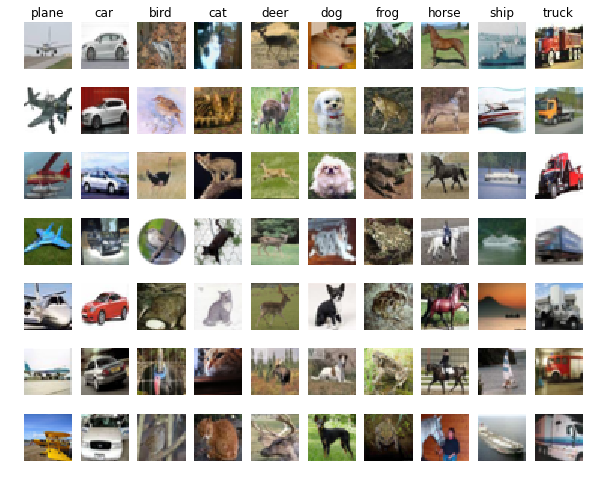

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
if show_img:
    cifar10.show(X, y)

In [5]:
# Subsample the data for more efficient code execution in this exercise
m = 5000
m_test = 500
X, y, X_test, y_test = cifar10.subsample_vec(X, y, X_test, y_test, m, m_test, debug = debug)
n = X.shape[0]

Cifar-10 data has been vectorized
X shape (5000, 3072)
y shape (5000,)
X_test shape (500, 3072)
y_test shape (500,)


D shape is: (500, 5000)


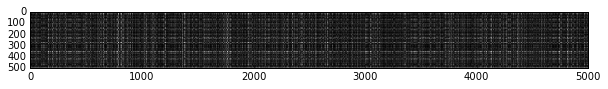

Got 137 / 500 correct, acc: 0.274000


In [7]:
from KNNClassifier import KNN
# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
model = KNN()
model.train(X, y)

# We would now like to classify the test data with the kNN classifier
# We use k = 1 (which is Nearest Neighbor).
y_hat = model.predict(X_test, hpara = 1, show_img = show_img)
num_correct = np.sum(y_hat == y_test)
acc = float(num_correct) / m_test
print 'Got %d / %d correct, acc: %f' % (num_correct, m_test, acc)

Inline Question #1: Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?

- Answer: Some testing points are far from almost every training points
    
- What causes the columns?

- Answer: Some training points are far from almost every testing points


D shape is: (500, 5000)


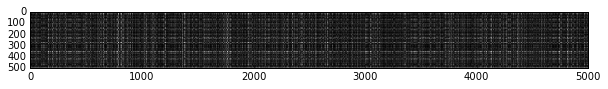

Got 139 / 500 correct, acc: 0.278000


In [8]:
# You should expect to see approximately 27% accuracy. Now lets try out a larger k, say k = 5
y_hat = model.predict(X_test, hpara = 5, show_img = show_img)
num_correct = np.sum(y_hat == y_test)
acc = float(num_correct) / m_test
print 'Got %d / %d correct, acc: %f' % (num_correct, m_test, acc)

# Cross-validation
We have implemented the k-Nearest Neighbor classifier but we set the value k = 5 arbitrarily. We will now determine the best value of this hyperparameter with cross-validation.

In [9]:
from cv import cv
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k2acc[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k2acc = {}

# Perform k-fold cross validation to find the best value of k. For each
# possible value of k, run the k-nearest-neighbor algorithm num_folds times, 
# where in each case you use all but one of the folds as training data and the 
# last fold as a validation set. Store the accuracies for all fold and all 
# values of k in the k_to_accuracies dictionary. 
for k in k_choices:
    hpara = k
    k2acc[k] = cv(X, y, num_folds, KNN, hpara)
    # Print out the computed accuracies
    print 'k =', k, 'acc =', [round(elm, 5) for elm in k2acc[k]]

k = 1 acc = [0.263, 0.257, 0.264, 0.278, 0.266]
k = 3 acc = [0.239, 0.249, 0.24, 0.266, 0.254]
k = 5 acc = [0.248, 0.266, 0.28, 0.292, 0.28]
k = 8 acc = [0.262, 0.282, 0.273, 0.29, 0.273]
k = 10 acc = [0.265, 0.296, 0.276, 0.284, 0.28]
k = 12 acc = [0.26, 0.295, 0.279, 0.283, 0.28]
k = 15 acc = [0.252, 0.289, 0.278, 0.282, 0.274]
k = 20 acc = [0.27, 0.279, 0.279, 0.282, 0.285]
k = 50 acc = [0.271, 0.288, 0.278, 0.269, 0.266]
k = 100 acc = [0.256, 0.27, 0.263, 0.256, 0.263]


In [10]:
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
# plot the raw observation
for k in k_choices:
    acc = k2acc[k]
    plt.scatter([k] * len(acc), acc)
    
# plot the trend line with error bars that correspond to std. dev.
acc_mean = np.array([np.mean(v) for k, v in sorted(k2acc.items())])
acc_std = np.array([np.std(v) for k, v in sorted(k2acc.items())])
plt.errorbar(k_choices, acc_mean, yerr = acc_std)
plt.title('CV on k')
plt.xlabel('k')
plt.ylabel('CV acc')
plt.show()

NameError: name 'k_choices' is not defined

In [ ]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
k_star = 10

model = KNN()
model.train(X, y)
y_hat = model.predict(X_test, k = k_star)

# Compute and display the acc.
num_correct = np.sum(y_hat == y_test)
acc = float(num_correct) / m_test
print 'Got %d / %d correct, acc = %f' % (num_correct, m_test, acc)